In [1]:
from __future__ import print_function
from pixell import enmap,utils, reproject, enplot
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import os,sys
import urllib.request
from scipy import interpolate
from astropy.table import QTable
import astropy.units as u
from astropy.io import fits
import csv
import yaml
from scipy.stats import norm
import matplotlib.patheffects as path_effects
import pickle as pk
from matplotlib.ticker import Locator
from astroquery.esasky import ESASky
import gzip
import shutil
import subprocess
from astropy.nddata import Cutout2D
from astropy import wcs


%matplotlib inline

In [22]:
def hersch_stacker(hmap, freq, ras, decs, width):
    stack = 0
    divisor = 0
    width = int(width)
    freq = freq
    hmap = hmap
    
    print(freq,hmap)

    hi_data = fits.open('/project/r/rbond/jorlo/herschel_maps/HATLAS/HATLAS_{}_BACKSUB{}.FITS'.format(hmap,freq))
    w = wcs.WCS(hi_data[0].header)
    for i in range(len(ras)):
        px, py = w.wcs_world2pix(ras[i], decs[i], 1)
        if np.isnan(px) or np.isnan(py) or ((px+width) >hi_data[0].data.shape[0]) or ((py+width) > hi_data[0].data.shape[0]):
            continue
        px = np.round(px).astype(int)
        py = np.round(py).astype(int)
        try:
            cutout = Cutout2D(hi_data[0].data, (px,py), width *2, mode = 'strict')
        except:
            continue
        stamp = cutout.data

        if not np.any(stamp):
            continue
    
        if stamp.shape != (2*width, 2*width):
            continue
        
        stack += stamp
        divisor += 1

    if divisor == 0:
        return
    stack /= divisor

    fig = plt.figure()

    bound = width*0.001667*60

    plt.imshow(stack, origin='lower', cmap=plt.cm.viridis, extent = [-bound,bound, -bound,bound])
    plt.colorbar()
    plt.title('MaDCoWS Clusters in {} {} $\mu$m \n {} in stack'.format(hmap, freq, divisor))
    plt.xlabel('RA (arcmin)')
    plt.ylabel('Dec (arcmin)')
    plt.savefig('./plots/herschel/{}_{}_mdcw.pdf'.format(hmap, freq))
    plt.savefig('./plots/herschel/{}_{}_mdcw.png'.format(hmap, freq), dpi = 300)
    plt.show()
    plt.close()

4.9396462


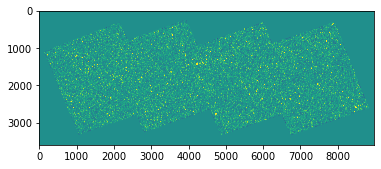

In [7]:
hi_data = fits.open('/project/r/rbond/jorlo/herschel_maps/HATLAS/HATLAS_GAMA12_DR1_BACKSUB250.FITS')
#hi_data[0].header
print(np.amax(hi_data[0].data))
bound = 1e-2
plt.imshow(hi_data[0].data, vmin = -bound, vmax = bound)
plt.show()

250 GAMA12_DR1


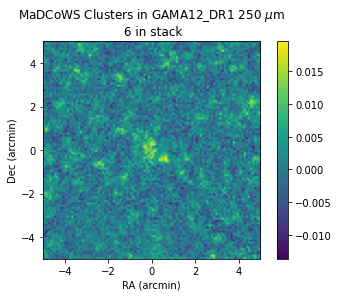

350 GAMA12_DR1


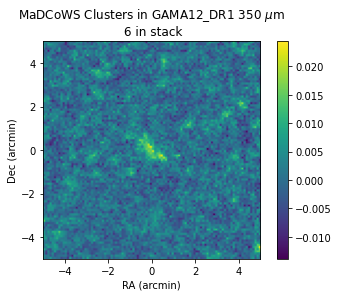

500 GAMA12_DR1


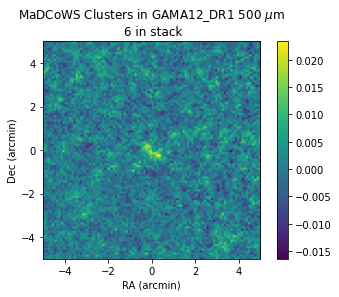

250 GAMA15_DR1


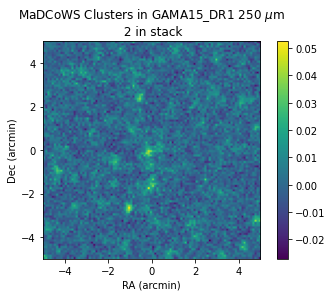

350 GAMA15_DR1


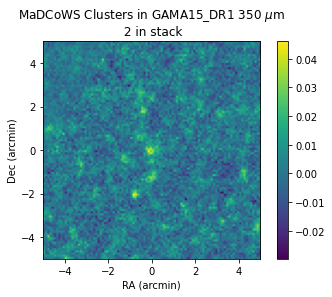

500 GAMA15_DR1


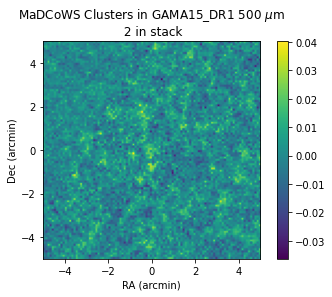

250 GAMA9_DR1


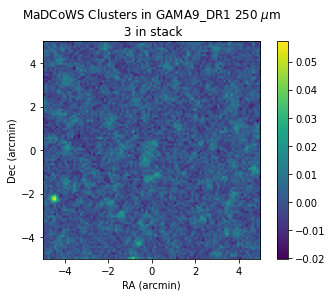

350 GAMA9_DR1


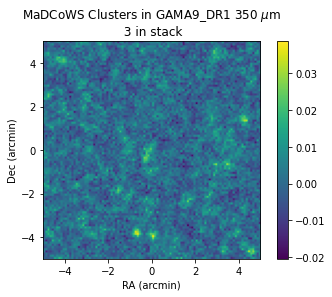

500 GAMA9_DR1


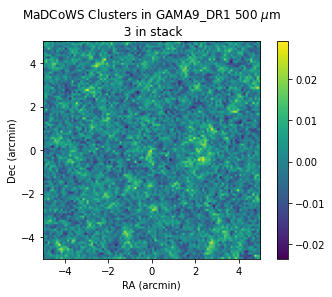

250 NGP_DR2


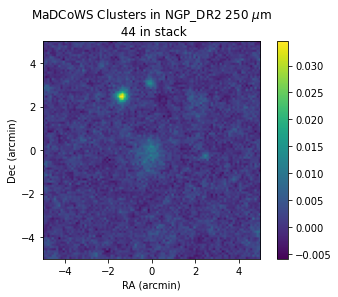

350 NGP_DR2


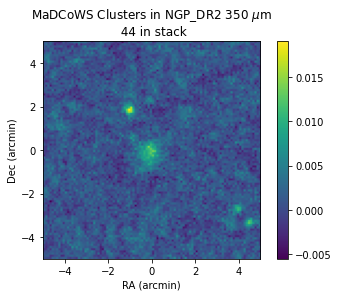

500 NGP_DR2


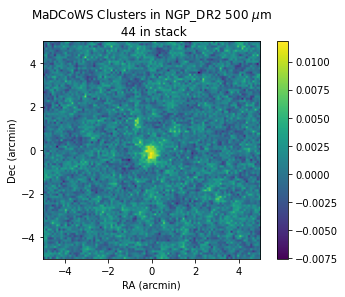

250 SGP_DR2


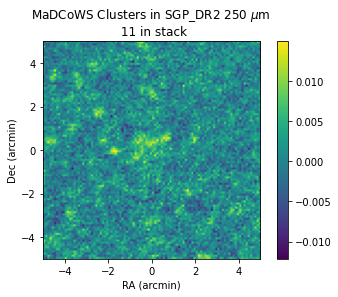

350 SGP_DR2


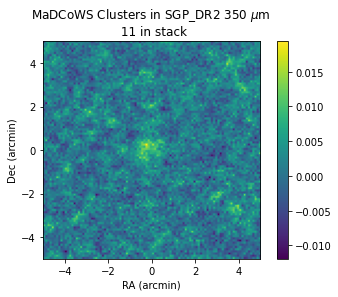

500 SGP_DR2


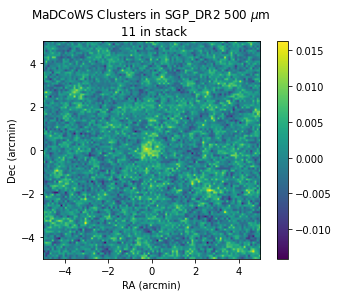

In [23]:
hmaps = ['GAMA12_DR1','GAMA15_DR1', 'GAMA9_DR1', 'NGP_DR2', 'SGP_DR2']
freqs = ['250', '350', '500']

mdcw_catalog = fits.open('/home/s/sievers/sdicker/ACTnCOWs/MADCOWSUnion.fits')

ras = mdcw_catalog[1].data['RADeg']
names = mdcw_catalog[1].data['name']
decs = mdcw_catalog[1].data['decDeg']
ras, decs = np.array(ras), np.array(decs)

for hmap in hmaps:
    for freq in freqs:
        hersch_stacker(hmap, freq, ras, decs, 50.)

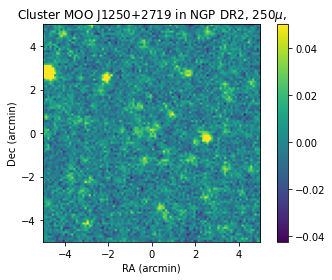

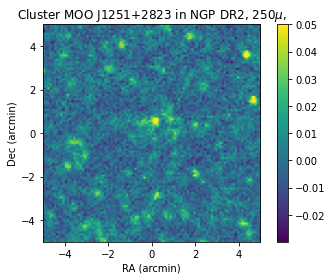

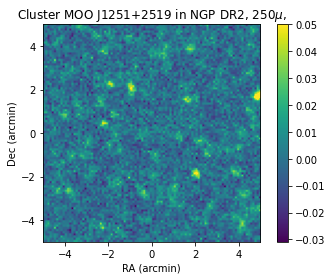

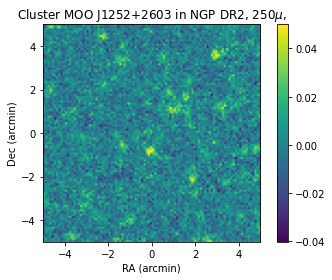

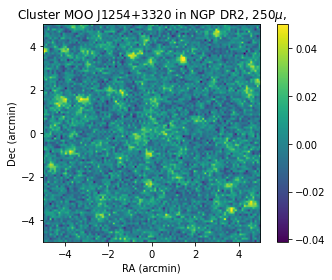

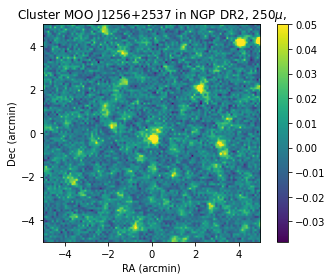

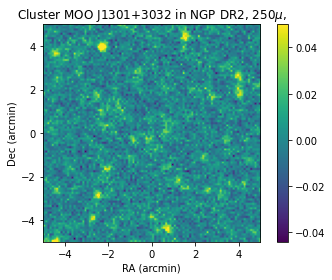

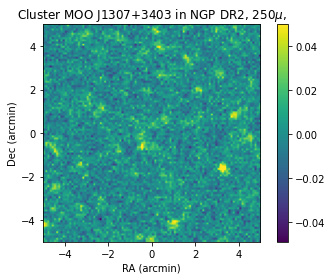

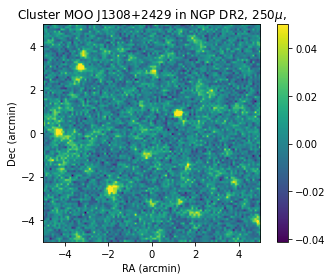

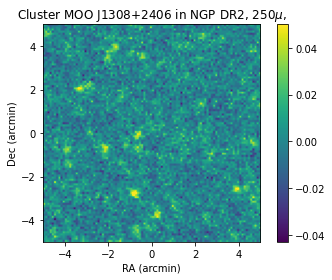

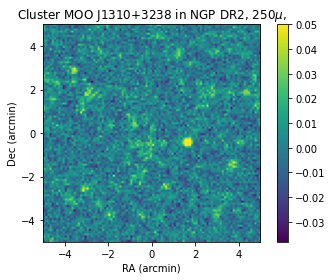

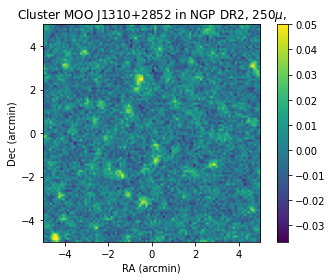

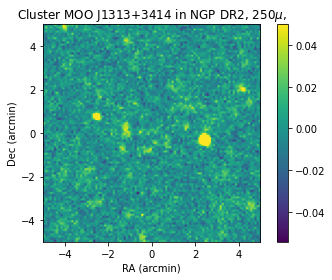

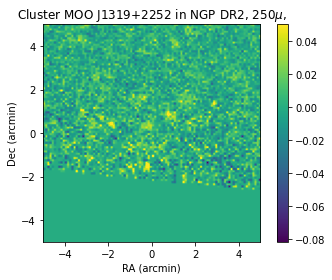

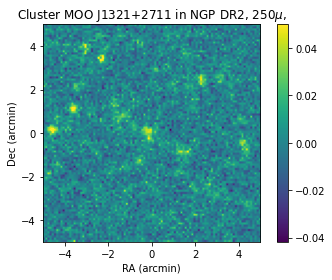

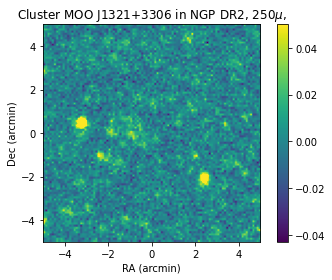

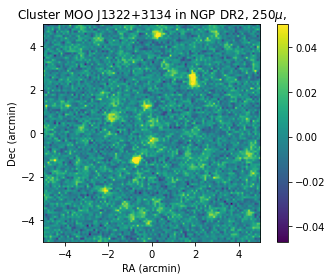

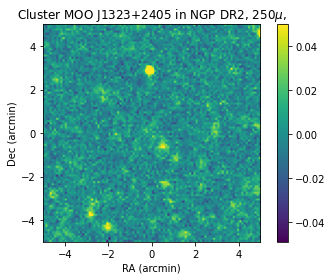

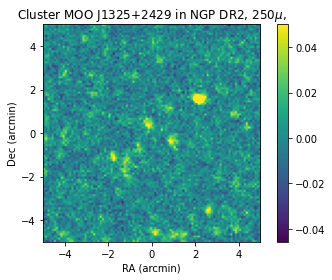

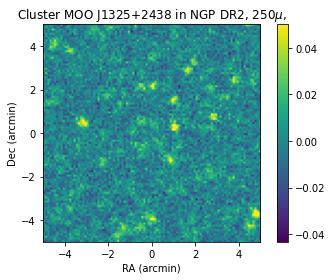

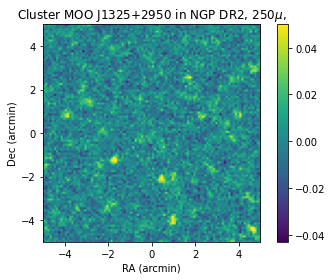

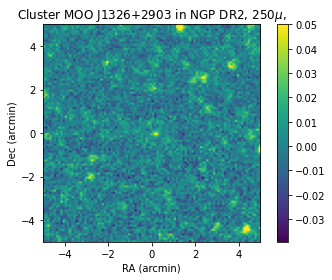

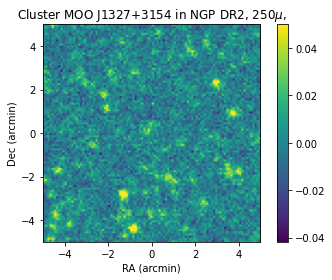

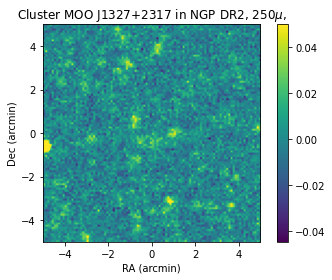

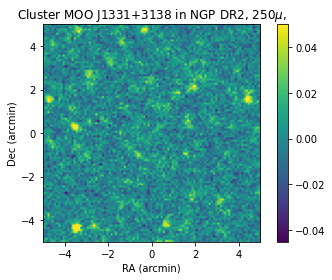

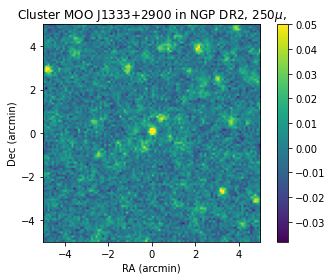

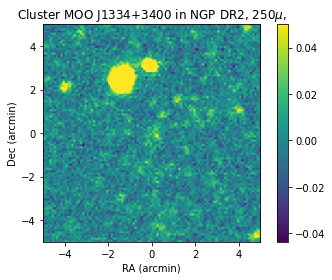

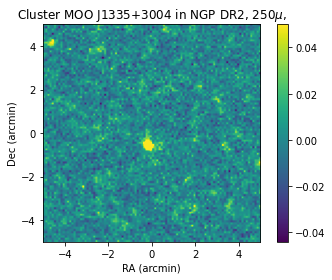

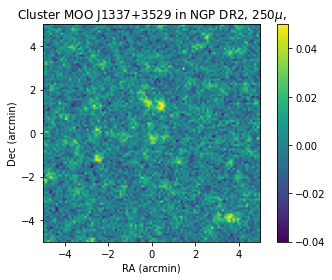

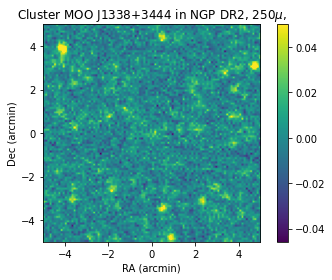

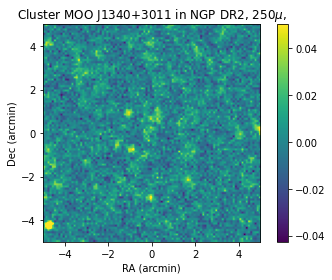

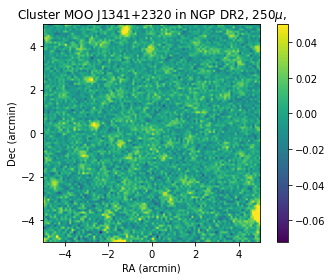

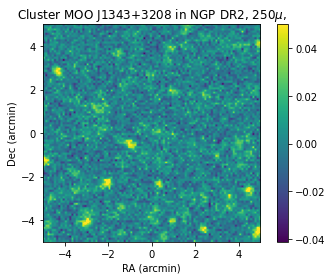

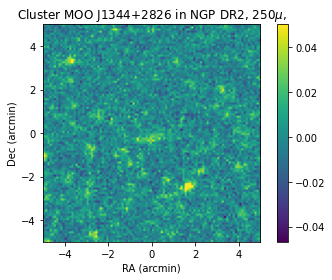

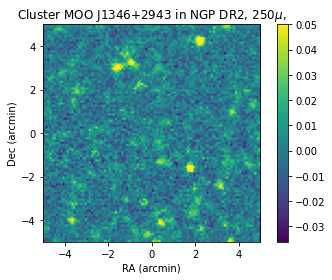

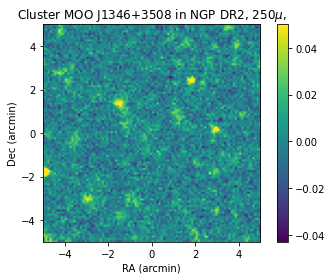

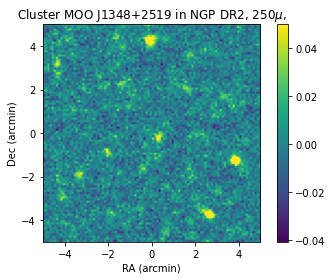

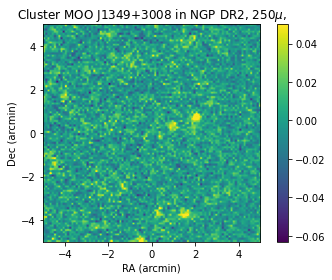

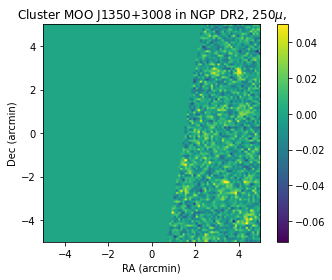

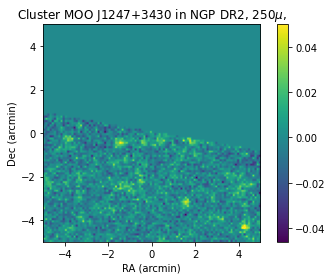

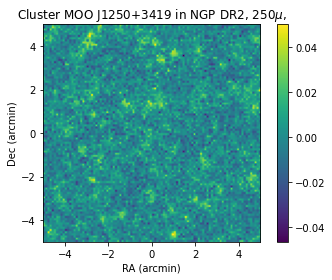

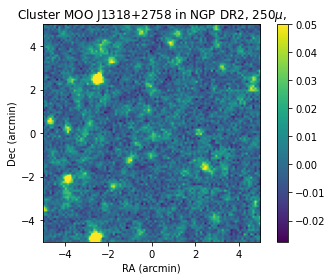

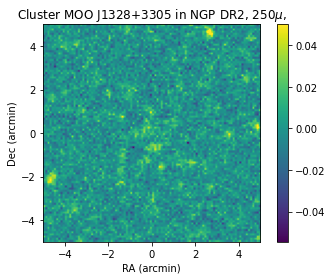

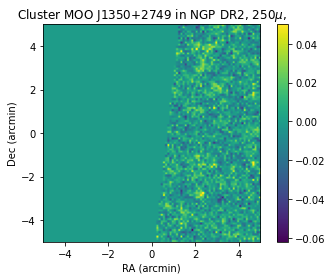

In [21]:
hi_data = fits.open('/project/r/rbond/jorlo/herschel_maps/HATLAS/HATLAS_NGP_DR2_BACKSUB250.FITS'.format(hmap,freq))
w = wcs.WCS(hi_data[0].header)

width = 50

for i in range(len(ras)):

    px, py = w.wcs_world2pix(ras[i], decs[i], 1)
    if np.isnan(px) or np.isnan(py) or ((px+width) >hi_data[0].data.shape[0]) or ((py+width) > hi_data[0].data.shape[0]):
        continue
    px = np.round(px).astype(int)
    py = np.round(py).astype(int)
    try:
        cutout = Cutout2D(hi_data[0].data, (px,py), width *2, mode = 'strict')
    except:
        continue
    stamp = cutout.data

    if not np.any(stamp):
        continue

    if stamp.shape != (2*width, 2*width):
        continue

    fig = plt.figure()

    bound = width*0.001667*60

    plt.imshow(stamp, origin='lower', cmap=plt.cm.viridis, vmax = 5e-2, extent = [-bound,bound, -bound,bound])
    #plt.imshow(hi_data[0].data, origin = 'lower')
    cutout.plot_on_original(color='white')
    plt.title('Cluster {} in NGP DR2, 250$\mu$,'.format(names[i]))
    plt.colorbar()
    plt.xlabel('RA (arcmin)')
    plt.ylabel('Dec (arcmin)')
    plt.savefig('./plots/herschel/{}_{}_{}_mdcw.pdf'.format(hmap, freq,names[i]))
    plt.savefig('./plots/herschel/{}_{}_{}_mdcw.png'.format(hmap, freq, names[i]), dpi = 300)
    plt.show()
    plt.close()

In [133]:
herschel_ps =  fits.open('/project/r/rbond/jorlo/herschel_maps/HATLAS/HATLAS_NGP_DR2_CATALOGUE_V1.4.FITS')

ras = herschel_ps[1].data['RA']
decs = herschel_ps[1].data['DEC']
ras, decs = np.array(ras), np.array(decs)


250 NGP_DR2


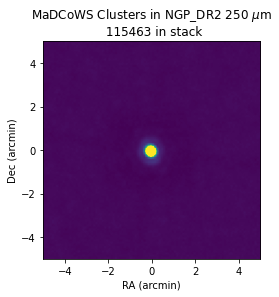

350 NGP_DR2


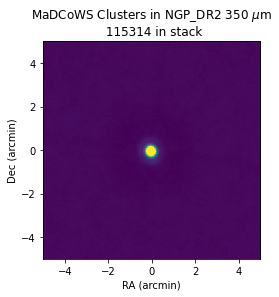

500 NGP_DR2


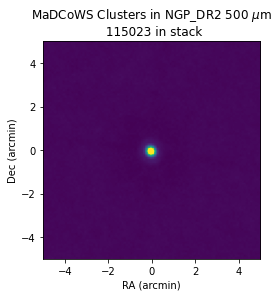

In [160]:

freqs = [ '250', '350', '500']
for freq in freqs:
    hersch_stacker('NGP_DR2', freq, ras, decs, 50.)

/home/r/rbond/jorlo/actmadcows/lib/python3.6/site-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # This is added back by InteractiveShellApp.init_path()


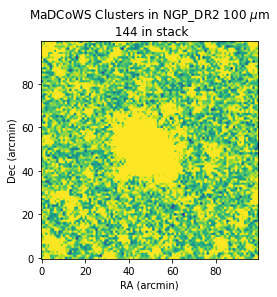

In [153]:
px2, py2 = w.wcs_world2pix(ras[1], decs[1], 1)


px2 = np.round(px2).astype(int)
py2 = np.round(py2).astype(int)

#stamp = hi_data[0].data[px-50: px+50, py-50: py+50]

cutout2 = Cutout2D(hi_data[0].data, (px2,py2), 100)

fig.add_subplot(111, projection=w)
plt.imshow(cutout2.data, origin='lower', cmap=plt.cm.viridis, vmax = 1e-2)
plt.title('MaDCoWS Clusters in {} {} $\mu$m \n {} in stack'.format(hmap, freq, divisor))
plt.xlabel('RA (arcmin)')
plt.ylabel('Dec (arcmin)')
#plt.savefig('./plots/herschel/{}_{}_filtered_mdcw.pdf'.format(hmap, freq))
#plt.savefig('./plots/herschel/{}_{}_filtered_mdcw.png'.format(hmap, freq), dpi = 300)
plt.show()
plt.close()

In [157]:
stack = cutout.data + cutout2.data
stack  /= 2